In [201]:
%matplotlib inline

# import some useful libraries
import pprint
import numpy as np                # numerical analysis linear algebra
import pandas as pd
import matplotlib.pyplot as plt   # plotting
from os import path
import glob
import numpy, tables
from scipy import ndimage
from scipy.io import loadmat
import h5py
from scipy import signal



fullFile = tables.open_file(r'C:\Users\lasya\crcns-vim1-lp3wv\data\EstimatedResponses.mat')
# print(fullFile.list_nodes); # Show all variables available

"""
cxReg value = cortex region
0 = other
1 = V1
2 = V2
3 = V3
4 = V3A
5 = V3B
6 = V4
7 = Lateral Occipital Area
"""

def BOLD_testing(subj, cxReg, imageStart=0, imageStop=1750):

    assert subj == "S1" or "S2", "please enter a valid subject"
    idx = []
    resp = []

    if subj == "S1":
        dat = fullFile.get_node('/dataValS1')[:]
        ROI = fullFile.get_node('/roiS1')[:].flatten()
        idx = numpy.nonzero(ROI == cxReg)[0]
        resp = dat[:, idx]

        return resp[imageStart:imageStop]

    else:
        dat = fullFile.get_node('/dataValS2')[:]
        ROI = fullFile.get_node('/roiS2')[:].flatten()
        idx = numpy.nonzero(ROI == cxReg)[0]
        resp = dat[:, idx]

        return resp[imageStart:imageStop]



def BOLD_training(subj, cxReg, imageStart=0, imageStop=1750):
    assert subj == "S1" or "S2", "please enter a valid subject"
    idx = []
    resp = []

    if subj == "S1":
        dat = fullFile.get_node('/dataTrnS1')[:]
        ROI = fullFile.get_node('/roiS1')[:].flatten()
        idx = numpy.nonzero(ROI == cxReg)[0]
        resp = dat[:, idx]

        return resp[imageStart:imageStop]

    else:
        dat = fullFile.get_node('/dataTrnS2')[:]
        ROI = fullFile.get_node('/roiS2')[:].flatten()
        idx = numpy.nonzero(ROI == cxReg)[0]
        resp = dat[:, idx]

        return resp[imageStart:imageStop]


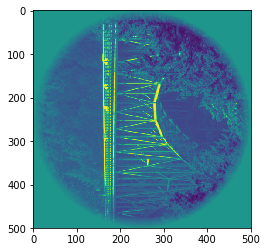

In [185]:
#Retrieving images used as stimuli
filepath = 'C:\Users\lasya\crcns-vim1-lp3wv\data\Stimuli_Val_FullRes.mat'

imageNum = 0 #Index for Stimulus image, out of 120 (index: 0-119)
f = h5py.File(filepath)
stimArray = f['stimVal']
imgplot = plt.imshow(stimArray[:, :, imageNum])

In [229]:
#print(fullFile.list_nodes)

#retrieving data sets for the first validation image, for Subject 2, across the various cortical regions
test = BOLD_testing("S2", 1, 0, 1) #V1
test1 = BOLD_testing("S2", 2, 0, 1) #V2
test2 = BOLD_testing("S2", 3, 0, 1) #V3
test3 = BOLD_testing("S2", 4, 0, 1) #V3A
test4 = BOLD_testing("S2", 5, 0, 1) #V3B
test5 = BOLD_testing("S2", 6, 0, 1) #V4

#data sets for Subject 1
s1test = BOLD_testing("S1", 1, 0, 1) #V1
s1test1 = BOLD_testing("S1", 2, 0, 1) #V2
s1test2 = BOLD_testing("S1", 3, 0, 1) #V3
s1test3 = BOLD_testing("S1", 4, 0, 1) #V3A
s1test4 = BOLD_testing("S1", 5, 0, 1) #V3B
s1test5 = np.nan_to_num(BOLD_testing("S1", 6, 0, 1)) #V4

Text(0.5,0,'Voxel')

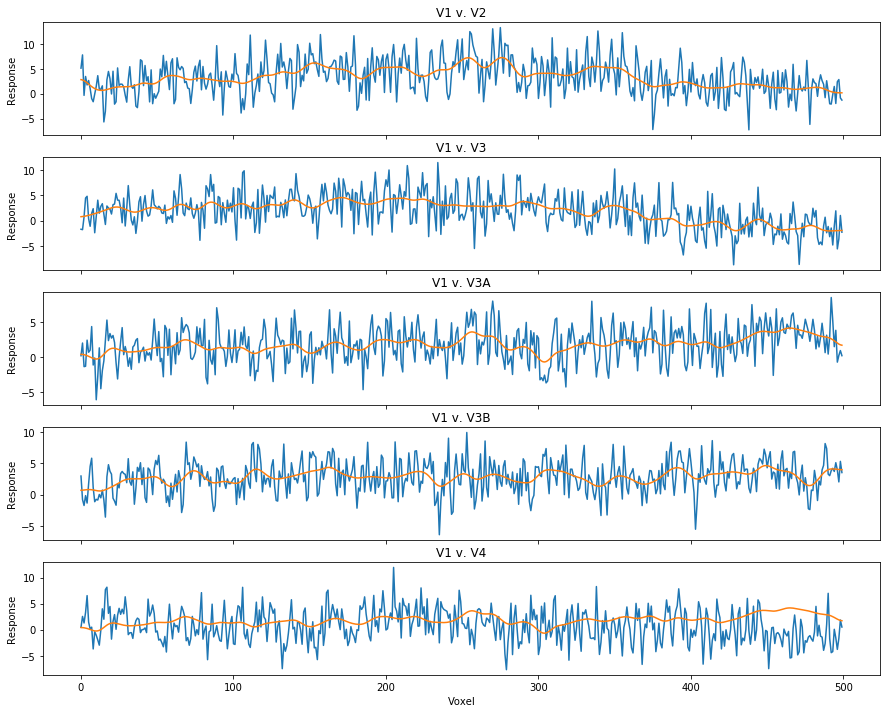

In [221]:
#Correlations and Filters on subset of V1 voxels with subset of voxels from other ROIs

fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,12))
corr1 = np.correlate(test[0][0:500], test1[0][0:500], mode="same") #V1 v. V2
line1= ndimage.gaussian_filter(corr1, 5)
corr2 = np.correlate(test[0][0:500], test2[0][0:500], mode="same") #V1 v. V3
line2 = ndimage.gaussian_filter(corr2, 5)
ax[0].plot(corr1)
ax[0].plot(line1)
ax[0].set_title("V1 v. V2")
ax[0].set_ylabel("Response")
ax[1].plot(corr2)
ax[1].plot(line2)
ax[1].set_title("V1 v. V3")
ax[1].set_ylabel("Response")

corr3 = np.correlate(test[0][0:500], test3[0][0:500], mode="same") #V1 v. V3A
line3 = ndimage.gaussian_filter(corr3, 5)
corr4 = np.correlate(test[0][0:500], test4[0][0:500], mode="same") #V1 v. V3B
line4 = ndimage.gaussian_filter(corr4, 5)
ax[2].plot(corr3)
ax[2].plot(line3)
ax[2].set_title("V1 v. V3A")
ax[2].set_ylabel("Response")
ax[3].plot(corr4)
ax[3].plot(line4)
ax[3].set_title("V1 v. V3B")
ax[3].set_ylabel("Response")

corr5 = np.correlate(test[0][0:500], test5[0][0:500], mode="same") #V1 v. V4
line5 = ndimage.gaussian_filter(corr5, 5)
ax[4].plot(corr5)
ax[4].plot(line3)
ax[4].set_title("V1 v. V4")
ax[4].set_ylabel("Response")
plt.xlabel("Voxel")


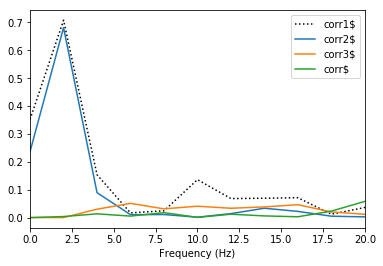

In [222]:
#Spectral Analyses
freq, S3 = signal.welch(corr1, nperseg=500, fs=1000)
plt.plot(freq, S3, 'k:', label=r"corr1$")
freq, H1S3 = signal.welch(corr2, nperseg=500, fs=1000)
plt.plot(freq, H1S3, label=r"corr2$")
freq, H1S3 = signal.welch(corr3, nperseg=500, fs=1000)
plt.plot(freq, H1S3, label=r"corr3$")
freq, H1S3 = signal.welch(corr4, nperseg=500, fs=1000)
plt.plot(freq, H1S3, label=r"corr$")

plt.xlim(0, 20)
plt.legend()
plt.xlabel("Frequency (Hz)");

Text(0.5,0,'Voxel')

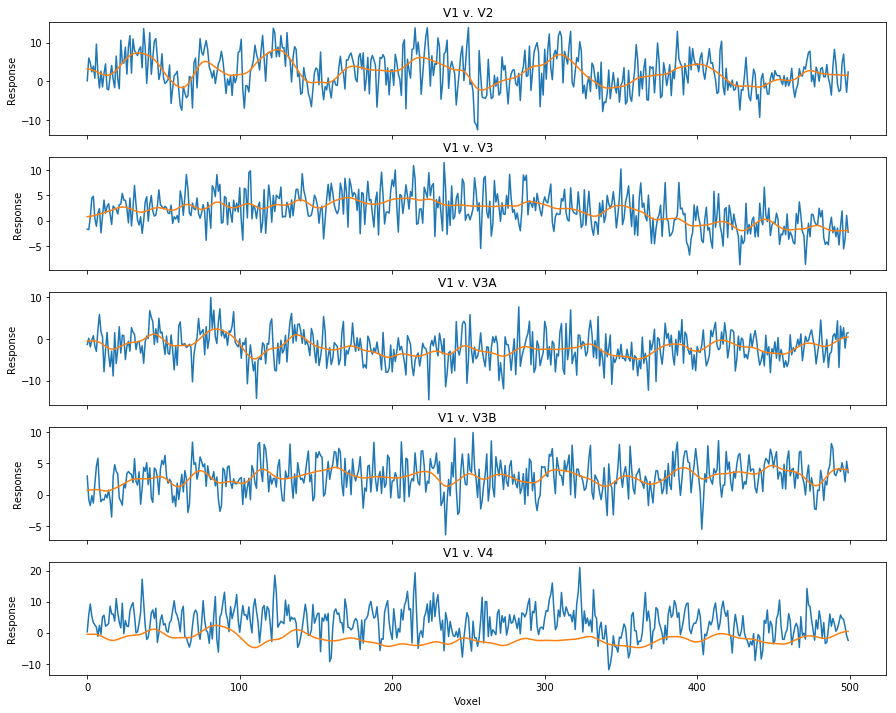

In [231]:
#Same Correlational Analyses conducted for Subject 1

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,12))

cor1 = np.correlate(s1test[0][0:500], s1test1[0][0:500], mode="same") #V1 v. V2
lin1= ndimage.gaussian_filter(cor1, 5)
cor2 = np.correlate(s1test[0][0:500], s1test2[0][0:500], mode="same") #V1 v. V3
lin2 = ndimage.gaussian_filter(cor2, 5)
axes[0].plot(cor1)
axes[0].plot(lin1)
axes[0].set_title("V1 v. V2")
axes[0].set_ylabel("Response")
axes[1].plot(corr2)
axes[1].plot(line2)
axes[1].set_title("V1 v. V3")
axes[1].set_ylabel("Response")

cor3 = np.correlate(s1test[0][0:500], s1test3[0][0:500], mode="same") #V1 v. V3A
lin3 = ndimage.gaussian_filter(cor3, 5)
cor4 = np.correlate(s1test[0][0:500], s1test4[0][0:500], mode="same") #V1 v. V3B
lin4 = ndimage.gaussian_filter(cor4, 5)
axes[2].plot(cor3)
axes[2].plot(lin3)
axes[2].set_title("V1 v. V3A")
axes[2].set_ylabel("Response")
axes[3].plot(corr4)
axes[3].plot(line4)
axes[3].set_title("V1 v. V3B")
axes[3].set_ylabel("Response")

cor5 = np.correlate(s1test[0][0:500], s1test5[0][0:500], mode="same") #V1 v. V4
lin5 = ndimage.gaussian_filter(cor5, 5)
axes[4].plot(cor5)
axes[4].plot(lin3)
axes[4].set_title("V1 v. V4")
axes[4].set_ylabel("Response")
plt.xlabel("Voxel")